 ## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

 - Home Creditはどのような企業？
 - このコンペティションでは何を予測する？
 - それを予測することで企業が得られるメリットは何？

ホームクレジットグループ

Home Creditは、前向きで安全な借入体験を提供することにより、銀行のない人々の金融包摂の拡大に努めています。 この十分なサービスを受けていない人々が確実に融資を受けられるようにするために、Home Creditは電話会社や取引情報を含むさまざまな代替データを使用して、クライアントの返済能力を予測します。

現在、Home Creditはさまざまな統計的手法や機械学習手法を使用してこれらの予測を行っていますが、Kagglersはデータの可能性を最大限に引き出すためにカグラーに挑戦しています。 そうすることで、返済可能なクライアントが拒否されず、ローンがクライアントの成功を支援する元本、満期、返済カレンダーが提供されることが保証されます。

 ### ①Home Creditはどのような企業？

 - Home Credit: 1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関です。同社は10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への融資に重点を置いています。

 ### ②このコンペティションでは何を予測する？
- クライアントの返済能力(TARGET)

 ### ③それを予測することで企業が得られるメリットは何？
 - 顧客拡大（返済可能な顧客が融資の拒否をされない）
 - 売上拡大
 - 貸倒の削減

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

 - .head()、.info()、describe()などを使う
 - 欠損値の有無を見る
 - クラスごとのデータ数をグラフに出す
 - それぞれ結果に対する説明や考察も行ってください。

 ### ①.head()、.info()、describe()などを使う

In [1]:
import pandas as pd

application = pd.read_csv("/Users/naoki/diveintocode-ml/application_train.csv")

In [2]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
application.shape

(307511, 122)

In [6]:
application["TARGET"]

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

 ### ②欠損値の有無を見る

In [7]:
import missingno as msno
%matplotlib inline

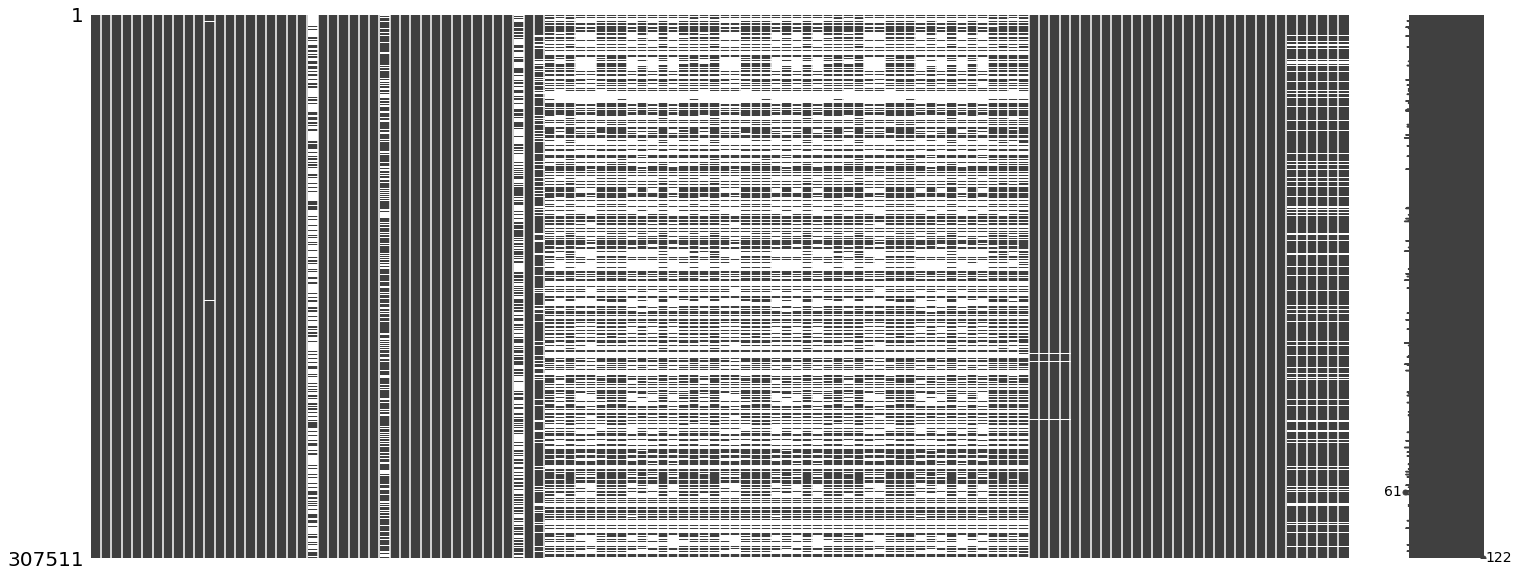

In [8]:
msno.matrix(application)

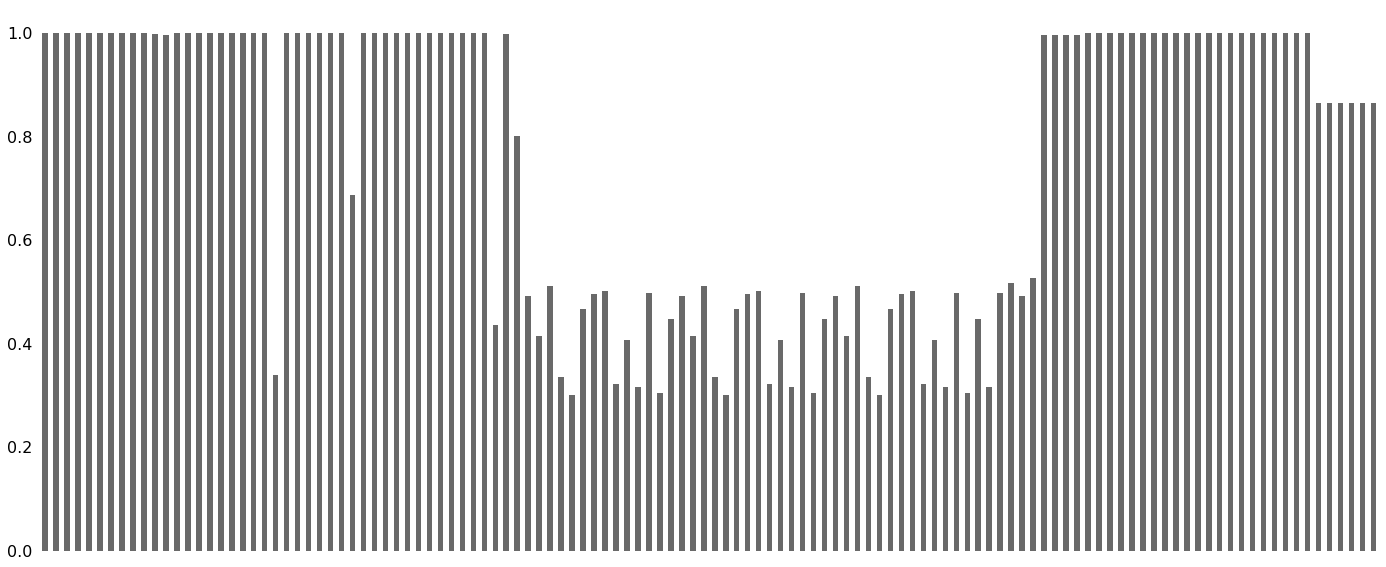

In [9]:
msno.bar(application)

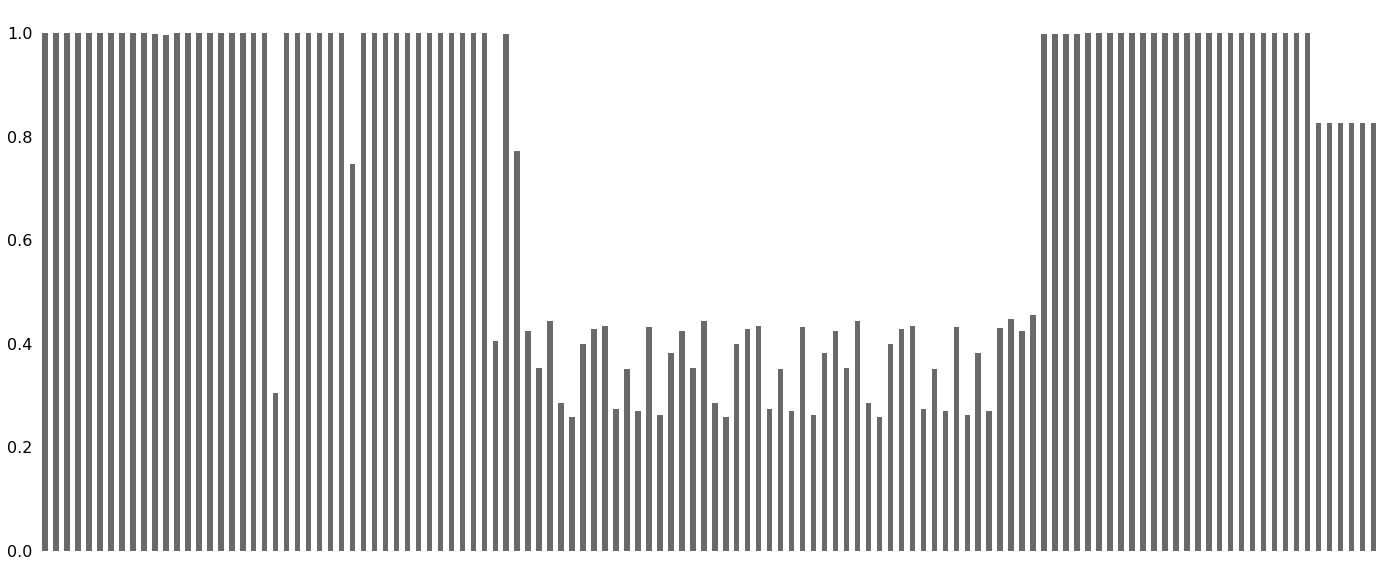

In [10]:
msno.bar(application[application["TARGET"] == 1])

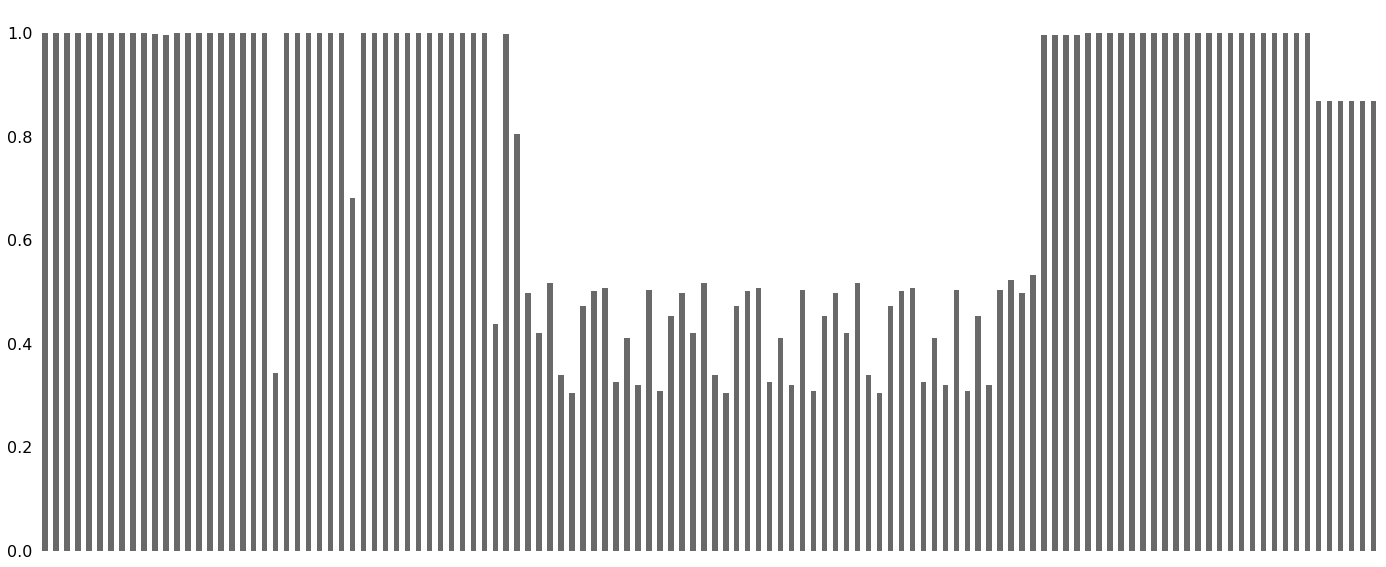

In [11]:
msno.bar(application[application["TARGET"] == 0])

In [12]:
application.isnull().sum() 

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

 ### ③クラスごとのデータ数をグラフに出す

<BarContainer object of 2 artists>

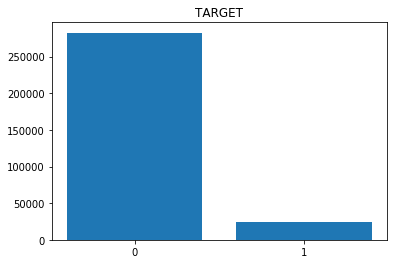

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
a = len(application[application["TARGET"] == 1])
b = len(application[application["TARGET"] == 0])
y = [a,b]
x = [1,0]
plt.title("TARGET")
plt.bar(x, y,tick_label= x)

In [14]:
len(application[application["TARGET"] == 1])

24825

In [15]:
for i in application.columns:
    print(i, application[i].isnull().sum(),sep=" : ") 

SK_ID_CURR : 0
TARGET : 0
NAME_CONTRACT_TYPE : 0
CODE_GENDER : 0
FLAG_OWN_CAR : 0
FLAG_OWN_REALTY : 0
CNT_CHILDREN : 0
AMT_INCOME_TOTAL : 0
AMT_CREDIT : 0
AMT_ANNUITY : 12
AMT_GOODS_PRICE : 278
NAME_TYPE_SUITE : 1292
NAME_INCOME_TYPE : 0
NAME_EDUCATION_TYPE : 0
NAME_FAMILY_STATUS : 0
NAME_HOUSING_TYPE : 0
REGION_POPULATION_RELATIVE : 0
DAYS_BIRTH : 0
DAYS_EMPLOYED : 0
DAYS_REGISTRATION : 0
DAYS_ID_PUBLISH : 0
OWN_CAR_AGE : 202929
FLAG_MOBIL : 0
FLAG_EMP_PHONE : 0
FLAG_WORK_PHONE : 0
FLAG_CONT_MOBILE : 0
FLAG_PHONE : 0
FLAG_EMAIL : 0
OCCUPATION_TYPE : 96391
CNT_FAM_MEMBERS : 2
REGION_RATING_CLIENT : 0
REGION_RATING_CLIENT_W_CITY : 0
WEEKDAY_APPR_PROCESS_START : 0
HOUR_APPR_PROCESS_START : 0
REG_REGION_NOT_LIVE_REGION : 0
REG_REGION_NOT_WORK_REGION : 0
LIVE_REGION_NOT_WORK_REGION : 0
REG_CITY_NOT_LIVE_CITY : 0
REG_CITY_NOT_WORK_CITY : 0
LIVE_CITY_NOT_WORK_CITY : 0
ORGANIZATION_TYPE : 0
EXT_SOURCE_1 : 173378
EXT_SOURCE_2 : 660
EXT_SOURCE_3 : 60965
APARTMENTS_AVG : 156061
BASEMENTAREA_AVG 

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。
<br>
 - 「TARGET」は、０のデータが多く、１のデータが非常に少ない。データに偏りが見られる。
 - 数値データに、欠損値が非常に多い。
 - 「TARGET」との相関係数の絶対値が、０.２を超えるデータは見られない。「TARGET」は、他の特徴量とほぼ無相関であると考えられる。
 - このデータには、「TARGET」の傾向を説明できる特徴量はみられない。
 - 他のデータとマージすることで、「TARGET」の傾向を説明できる特徴量を追加する必要がある。

 ## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [16]:
#数値データのみを抽出し、application2に格納

application2 = application
list_str=[]

for i in application.columns:
    if application[i].dtypes == 'O':
        application2 = application2.drop([i], axis = 1)
        list_str.append(i)

In [18]:
application2.describe() #1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


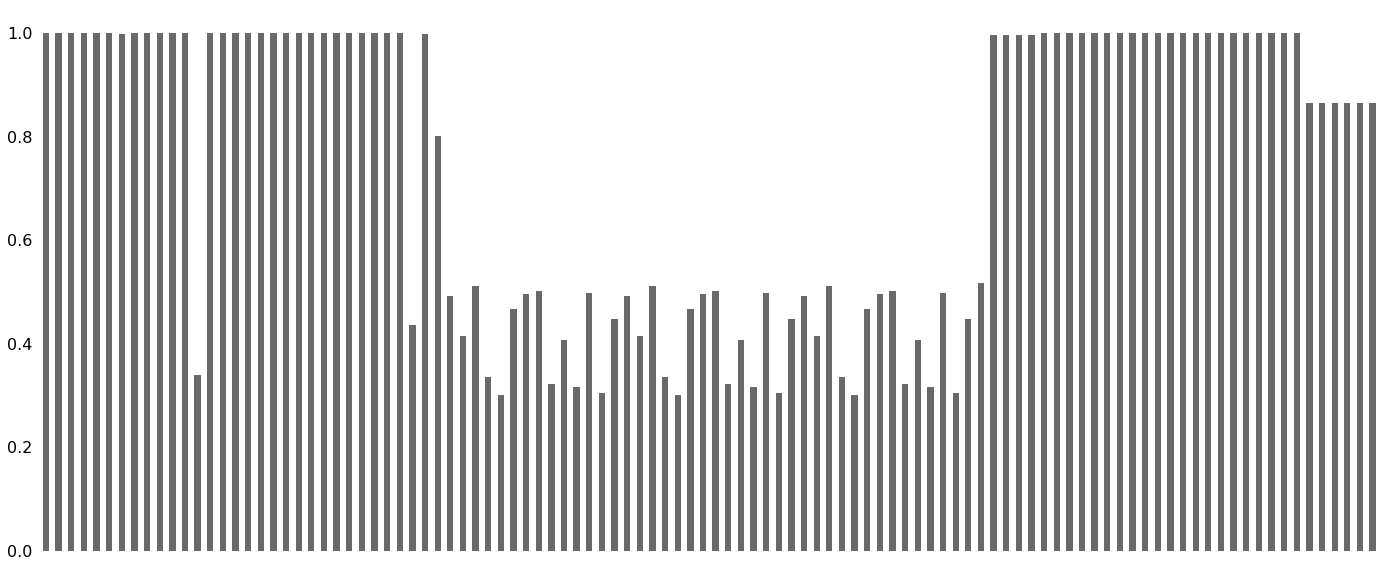

In [19]:
#数値データには、nullデータが多い。　
msno.bar(application2) #2

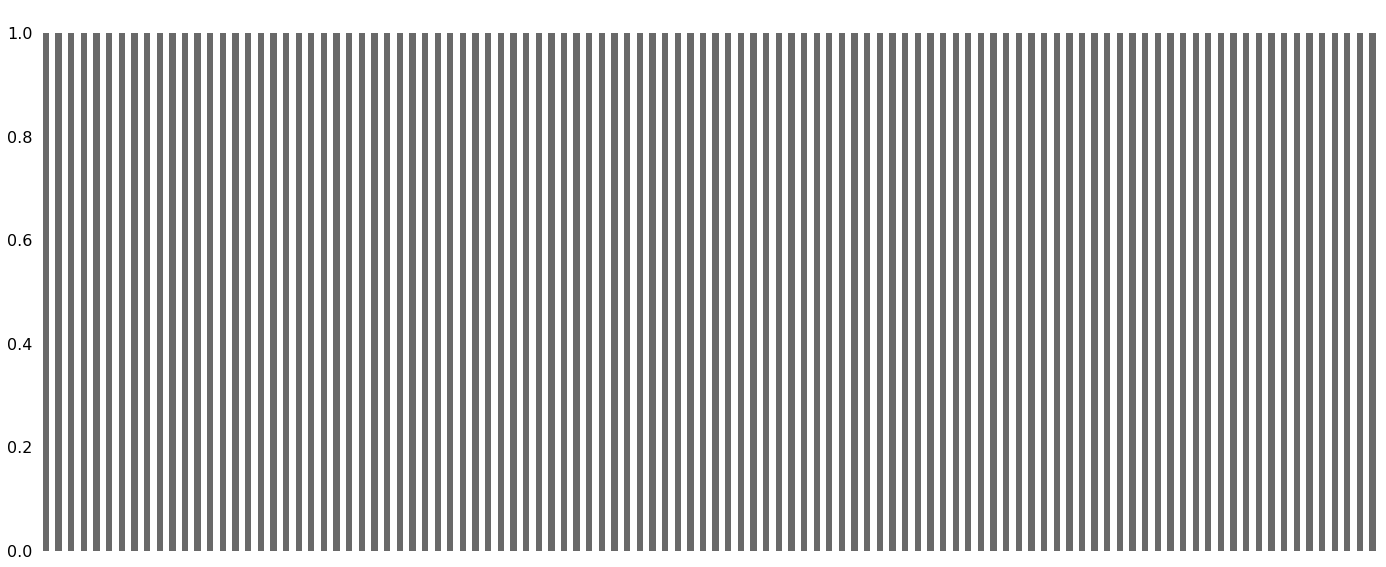

In [20]:
# 欠損値を０に置換する。
import numpy as np
application2 = application2.replace(np.nan,0)
msno.bar(application2) #3

In [22]:
# カテゴリーデータをダミー変数化
application_str = application[list_str]
application_dummy = pd.get_dummies(application_str)
application_dummy.head() #4

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


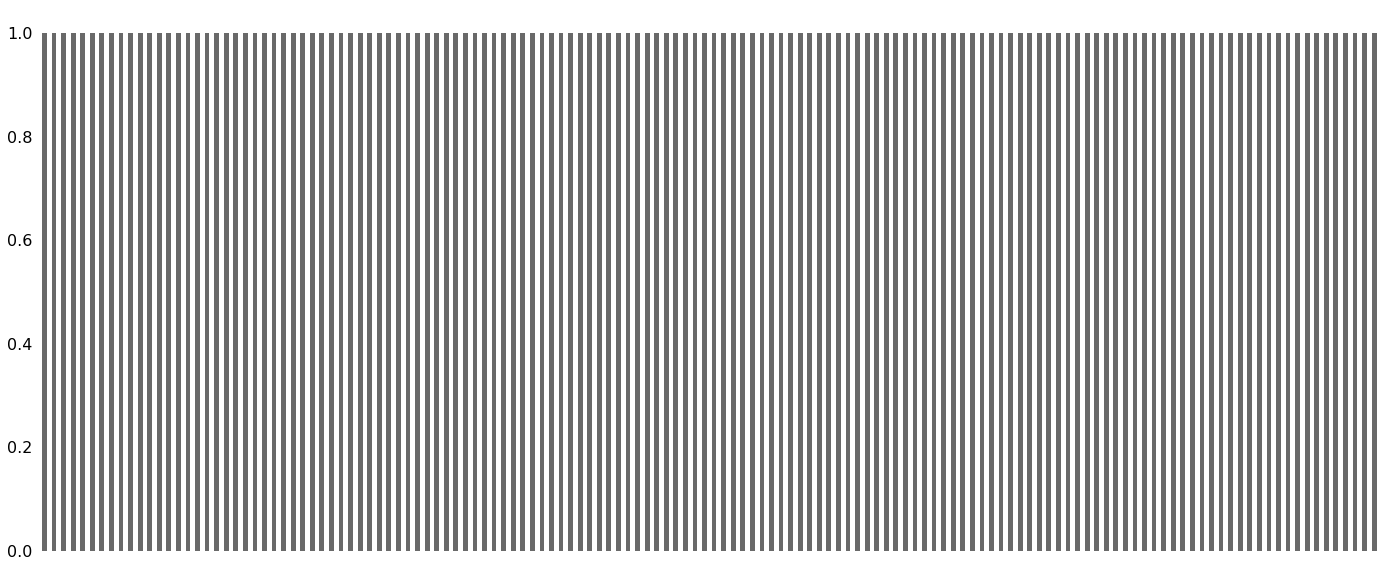

In [23]:
# ダミー変数化したカテゴリーデータは、欠損値がない。
msno.bar(application_dummy) #5

In [24]:
#ダミー変数化したカテゴリーデータと、欠損値を０で置換した数値データを結合
application_mix = pd.concat([application2, application_dummy], axis=1)
application_mix.head() #6

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [25]:
application_mix.corr() #7

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000407,-0.000390,0.000849,-0.001500,0.001366,...,0.000553,0.002073,-0.000976,0.000072,-0.001396,0.002300,-0.001281,-0.000270,0.000510,0.002549
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012794,-0.039565,-0.037227,0.078239,-0.044932,...,0.000982,-0.006777,-0.001713,-0.009384,0.000628,-0.033119,-0.012657,0.007946,-0.042201,0.004829
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021414,-0.002008,-0.025573,0.330938,-0.239818,...,-0.001830,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-0.025088,0.011036,-0.038644,0.004525
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191639,0.159664,0.074796,0.027261,-0.064223,...,0.000718,0.011696,0.006149,0.023886,0.003886,0.032753,0.016523,-0.003369,0.050174,-0.002894
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770080,0.986687,0.099738,-0.055436,-0.066838,...,0.000869,0.014314,0.007987,0.027255,0.005799,0.046644,0.009756,-0.007373,0.058256,-0.004308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALLSMATERIAL_MODE_Panel,0.002300,-0.033119,-0.020892,0.032753,0.046644,0.054991,0.049862,0.092652,-0.013597,-0.004193,...,-0.020005,-0.092112,-0.045358,-0.039892,-0.038117,1.000000,-0.270257,-0.069666,0.502903,-0.039280
"WALLSMATERIAL_MODE_Stone, brick",-0.001281,-0.012657,-0.025088,0.016523,0.009756,0.009166,0.012854,0.010782,-0.010964,-0.006327,...,0.027683,-0.091023,-0.044822,-0.039421,-0.037666,-0.270257,1.000000,-0.068843,0.491544,-0.007605
WALLSMATERIAL_MODE_Wooden,-0.000270,0.007946,0.011036,-0.003369,-0.007373,-0.007701,-0.009269,-0.056263,0.008758,-0.002846,...,0.121678,-0.023464,-0.011554,-0.010162,-0.009710,-0.069666,-0.068843,1.000000,0.078964,0.273271
EMERGENCYSTATE_MODE_No,0.000510,-0.042201,-0.038644,0.050174,0.058256,0.068142,0.062913,0.103513,-0.019852,-0.010907,...,0.053146,0.165333,0.076786,0.073260,0.060550,0.502903,0.491544,0.078964,1.000000,-0.090624


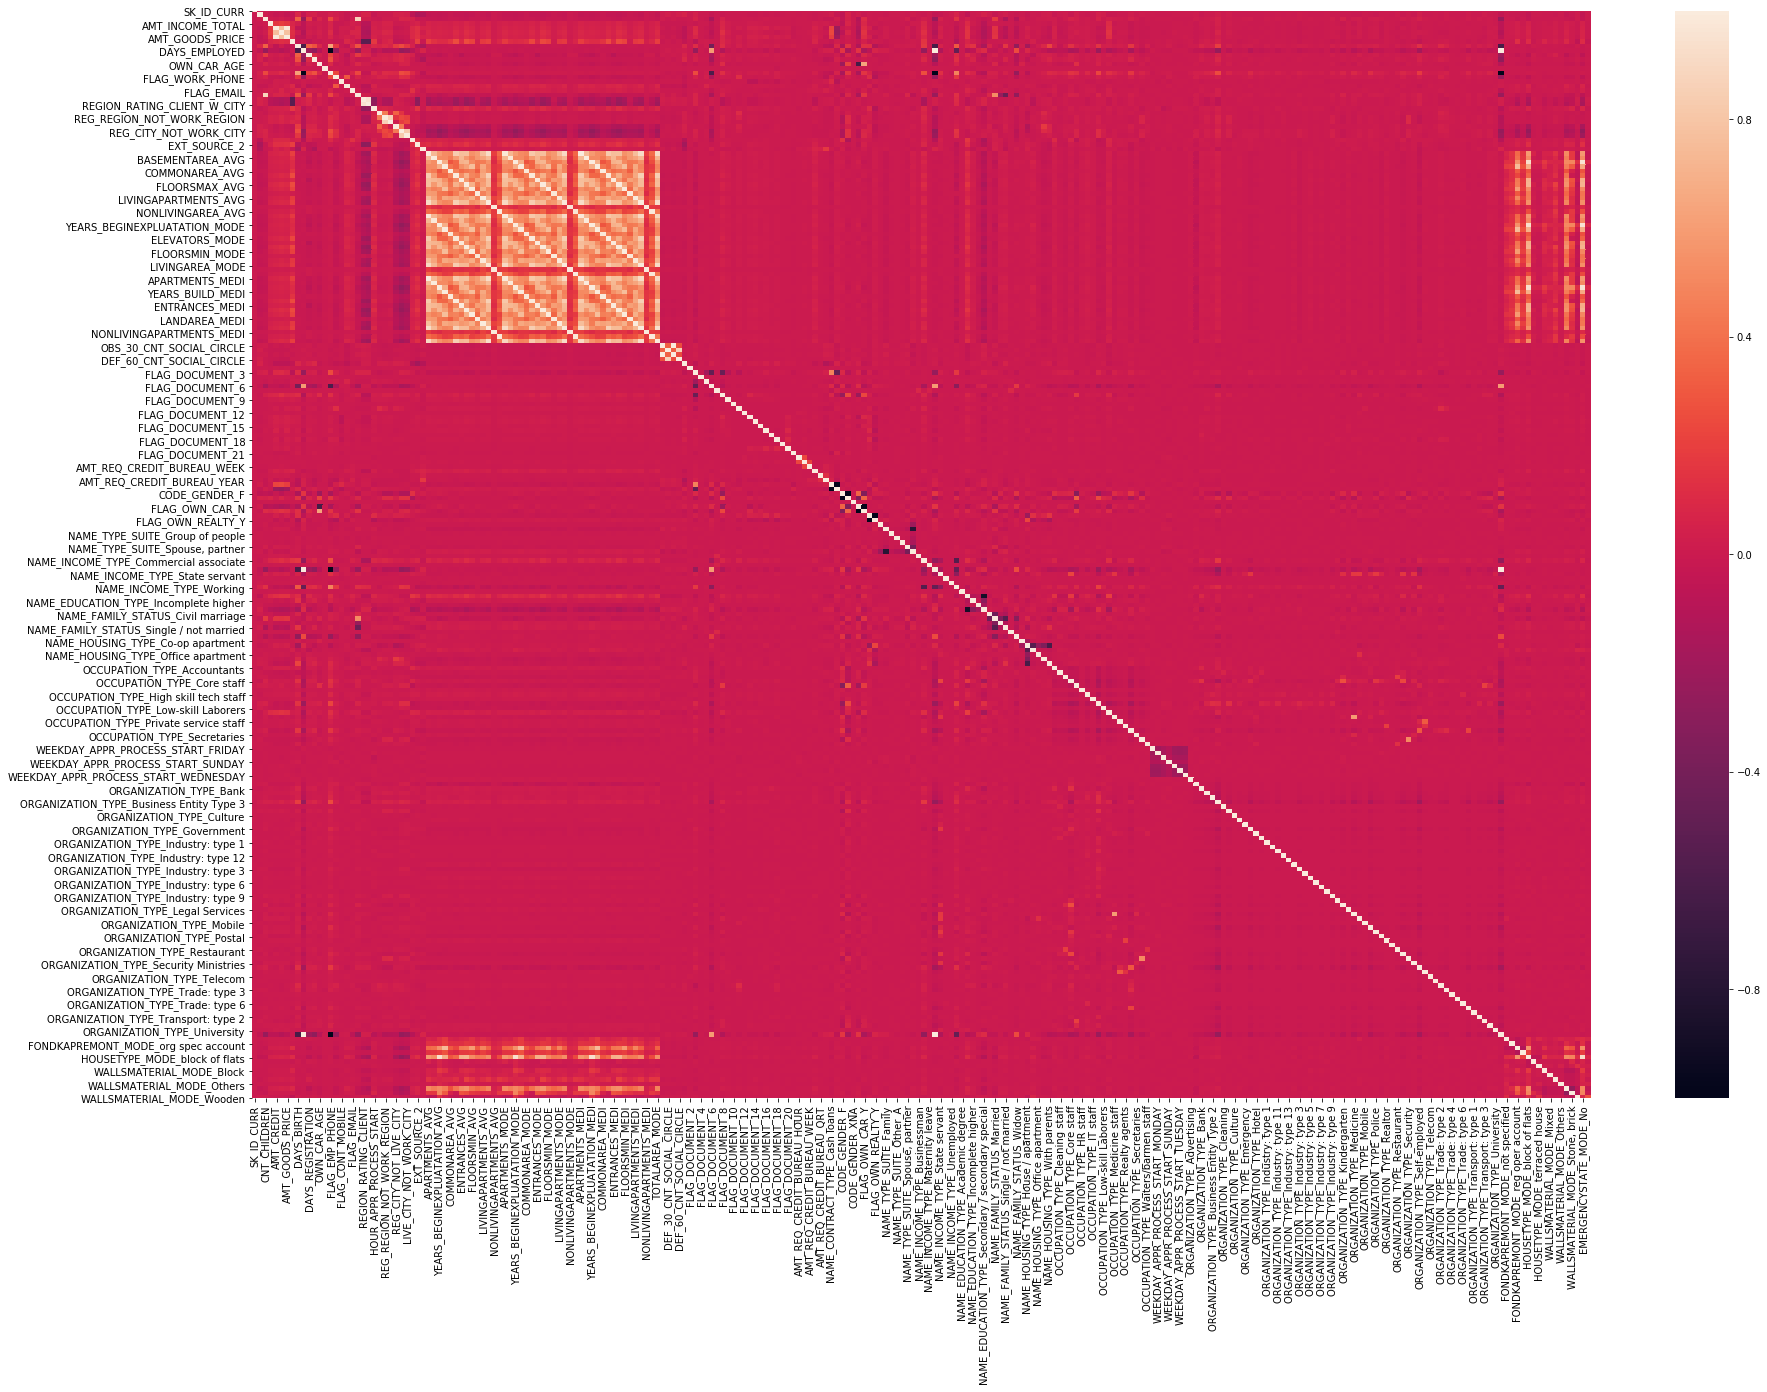

In [26]:
plt.figure(figsize=(30, 20))
sns.heatmap(application_mix.corr(), annot=False) #8

In [27]:
from scipy.stats import pearsonr

list_i = []
for i in application_mix.columns: #9
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    print("{} :  {}".format(i,a)) 

SK_ID_CURR :  -0.0021084690181977176
TARGET :  0.9999999999999735
CNT_CHILDREN :  0.019187133596270233
AMT_INCOME_TOTAL :  -0.00398186560120567
AMT_CREDIT :  -0.030369286461429744
AMT_ANNUITY :  -0.012794036703988612
AMT_GOODS_PRICE :  -0.03956533747621206
REGION_POPULATION_RELATIVE :  -0.037227148542445236
DAYS_BIRTH :  0.07823930830982699
DAYS_EMPLOYED :  -0.044931662657738666
DAYS_REGISTRATION :  0.04197486283141716
DAYS_ID_PUBLISH :  0.05145717260705747
OWN_CAR_AGE :  0.00228535206596729
FLAG_MOBIL :  0.0005343955790281785
FLAG_EMP_PHONE :  0.04598221971659194
FLAG_WORK_PHONE :  0.028524322363217593
FLAG_CONT_MOBILE :  0.0003701268023491201
FLAG_PHONE :  -0.023806272330357717
FLAG_EMAIL :  -0.0017583834312544795
CNT_FAM_MEMBERS :  0.009312168432937301
REGION_RATING_CLIENT :  0.05889901494571257
REGION_RATING_CLIENT_W_CITY :  0.06089266756482207
HOUR_APPR_PROCESS_START :  -0.024165831430094237
REG_REGION_NOT_LIVE_REGION :  0.005575944520908256
REG_REGION_NOT_WORK_REGION :  0.0069419

ORGANIZATION_TYPE_Housing :  -0.00046423957385297894
ORGANIZATION_TYPE_Industry: type 1 :  0.006402340351265373
ORGANIZATION_TYPE_Industry: type 10 :  -0.001141129604135258
ORGANIZATION_TYPE_Industry: type 11 :  0.002008649353922154
ORGANIZATION_TYPE_Industry: type 12 :  -0.005444197971605891
ORGANIZATION_TYPE_Industry: type 13 :  0.002904553093278851
ORGANIZATION_TYPE_Industry: type 2 :  -0.001230071610708894
ORGANIZATION_TYPE_Industry: type 3 :  0.009691051180979803
ORGANIZATION_TYPE_Industry: type 4 :  0.004074224985598311
ORGANIZATION_TYPE_Industry: type 5 :  -0.0019916750400934004
ORGANIZATION_TYPE_Industry: type 6 :  -0.0006516526920783154
ORGANIZATION_TYPE_Industry: type 7 :  -9.405271151200943e-05
ORGANIZATION_TYPE_Industry: type 8 :  0.0014357446973905156
ORGANIZATION_TYPE_Industry: type 9 :  -0.005378514581978099
ORGANIZATION_TYPE_Insurance :  -0.0038495235189539073
ORGANIZATION_TYPE_Kindergarten :  -0.005764183870326652
ORGANIZATION_TYPE_Legal Services :  -0.0002359890687349

In [31]:
#　「TARGET」との相関係数の絶対値が、０.２を超えるデータは見られない。
list_i = []
for i in application_mix.columns: #8
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    if 0.05 < abs(a) :
        list_i.append(i)
        print("{},{}".format(i,a))  

TARGET,0.9999999999999735
DAYS_BIRTH,0.07823930830982699
DAYS_ID_PUBLISH,0.05145717260705747
REGION_RATING_CLIENT,0.05889901494571257
REGION_RATING_CLIENT_W_CITY,0.06089266756482207
REG_CITY_NOT_WORK_CITY,0.05099446436812559
EXT_SOURCE_1,-0.06469813333590538
EXT_SOURCE_2,-0.1590296765101743
EXT_SOURCE_3,-0.11957192848712464
DAYS_LAST_PHONE_CHANGE,0.055217231616735266
CODE_GENDER_F,-0.05470405317880836
CODE_GENDER_M,0.05471268197127105
NAME_INCOME_TYPE_Working,0.05748118481836555
NAME_EDUCATION_TYPE_Higher education,-0.05659264414096324


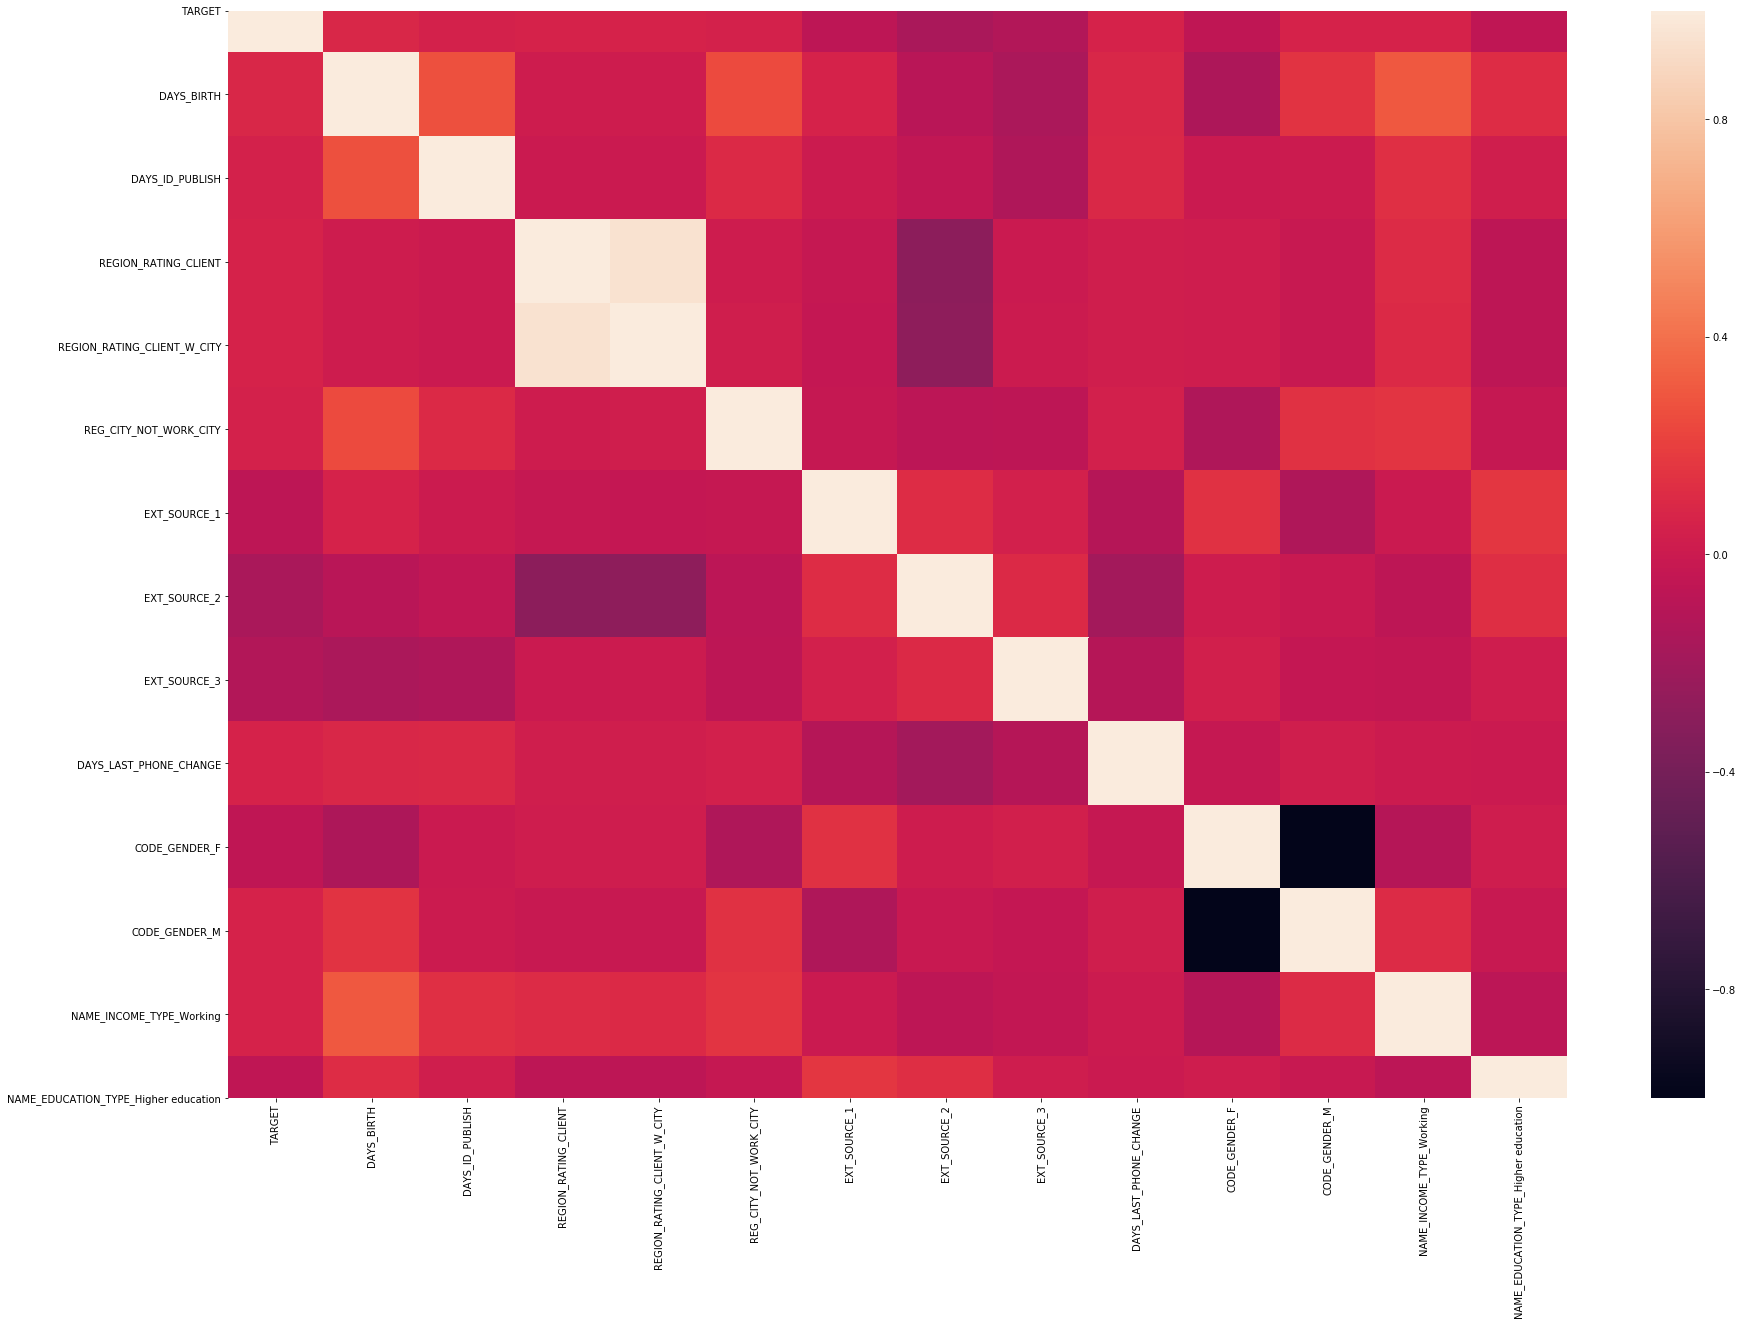

In [32]:
#「TARGET」との相関係数は「EXT_SOURCE_2」と「EXT_SOURCE_3」が相対的に高そうに見える
plt.figure(figsize=(30, 20))
sns.heatmap(application_mix[list_i].corr(), annot=False)　　#10

In [30]:
#　「TARGET」との相関係数の絶対値が、０.1を超えるデータは「EXT_SOURCE_2」と「EXT_SOURCE_3」の二つだけである。
list_i = []
for i in application_mix.columns: #11
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    if 0.1 < abs(a) :
        print("{},{}".format(i,a)) 

TARGET,0.9999999999999735
EXT_SOURCE_2,-0.1590296765101743
EXT_SOURCE_3,-0.11957192848712464


In [35]:
application_mix_0 = application_mix[application_mix["TARGET"]==0]
application_mix_1 = application_mix[application_mix["TARGET"]==1]

Text(0.5, 1.0, 'EXT_SOURCE_2(TARGET=0)')

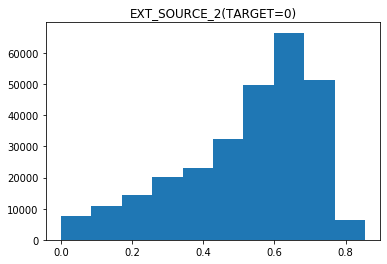

In [38]:
plt.hist(application_mix_0["EXT_SOURCE_2"])
plt.title("EXT_SOURCE_2(TARGET=0)") #12

Text(0.5, 1.0, 'EXT_SOURCE_2(TARGET=1)')

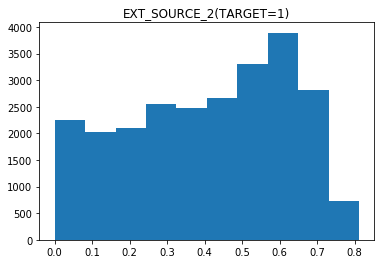

In [39]:
#TARGET別（1or0）にEXT_SOURCE_2をみると、TARGETが０の場合と１の場合とでは、EXT_SOURCE_2の分布が異なる
plt.hist(application_mix_1["EXT_SOURCE_2"])
plt.title("EXT_SOURCE_2(TARGET=1)") #13

Text(0.5, 1.0, 'EXT_SOURCE_2(TARGET=0)')

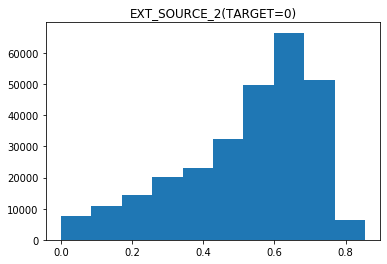

In [40]:
plt.hist(application_mix_0["EXT_SOURCE_3"])
plt.title("EXT_SOURCE_3(TARGET=0)") #14

Text(0.5, 1.0, 'EXT_SOURCE_3(TARGET=1)')

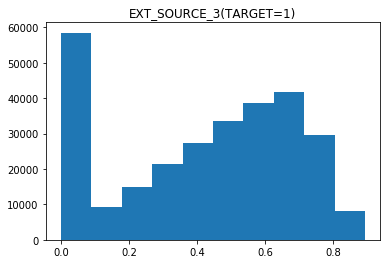

In [41]:
#TARGET別（1or0）にEXT_SOURCE_3をみると、TARGETが０の場合と１の場合とでは、EXT_SOURCE_3の分布が大きく異なる
plt.hist(application_mix_0["EXT_SOURCE_3"])
plt.title("EXT_SOURCE_3(TARGET=1)") #15